<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1591228800&v=beta&t=4uXLGuPLZdw16VZmiqkPdu57s6oSUWT-advRTvwzp5Q" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 5. Entendimiento de datos

### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)


<a id='beginning'></a>

En esta sección veremos una breve introducción a conceptos básicos y una primera aproximación a los datos a través del análisis exploratorio:

1. [Variables e indicadores](#part1) 
2. [Tipos de datos](#part2)
3. [Análisis exploratorio de datos (AED)](#part3)

In [1]:
from IPython.display import Image
%matplotlib inline

<a id='part3'></a>
## Análisis exploratorio de datos (AED)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [31]:
os.chdir("D:/Python/1. Nivel I/5/datos")#directorio de trabajo

In [4]:
os.getcwd()

'D:\\Python\\1. Nivel I\\5\\datos'

In [32]:
FileCSV="MarketingDirecto.csv"
mark=pd.read_csv(FileCSV,  sep=',')
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [6]:
# Controlando valores nulos
mark.isnull().any().any()

True

In [7]:
#porcentaje de valores null por columna
(mark.isnull().sum() / len(mark))*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         0.0
dtype: float64

In [8]:
#número de casos
len(mark)

1000

In [9]:
type(mark)

pandas.core.frame.DataFrame

In [10]:
mark.dtypes

Edad         object
Genero       object
Vivienda     object
Ecivil       object
Ubicacion    object
Salario       int64
Hijos         int64
Historial    object
Catalogos     int64
Monto         int64
dtype: object

In [33]:
# Agrupando columnas por tipo de datos
tipos = mark.columns.to_series().groupby(mark.dtypes).groups

In [34]:
tipos

{dtype('int64'): Index(['Salario', 'Hijos', 'Catalogos', 'Monto'], dtype='object'),
 dtype('O'): Index(['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial'], dtype='object')}

In [35]:
# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos. 

6

In [36]:
ctext

Index(['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial'], dtype='object')

In [37]:
# Armando lista de columnas numéricas
columnas = mark.columns  # lista de todas las columnas
columnas

Index(['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Salario', 'Hijos',
       'Historial', 'Catalogos', 'Monto'],
      dtype='object')

In [38]:
cnum = list(set(columnas) - set(ctext))
len(cnum)

4

In [39]:
cnum

['Catalogos', 'Monto', 'Salario', 'Hijos']

In [40]:
#Bucle
# Completando valores faltantas datos cuantititavos
for c in cnum:
    media = mark[c].mean()
    mark[c] = mark[c].fillna(media)

In [41]:
#Bucle
# Completando valores faltantas datos categóricos
for c in ctext:
    mode = mark[c].mode()[0]
    mark[c] = mark[c].fillna(mode)

In [42]:
mark['Ecivil'].mode()[0]

'Casado'

In [43]:
#Controlando que no hayan valores faltantes
mark.isnull().any().any()

False

In [44]:
#porcentaje de valores null por columna
(mark.isnull().sum() / len(mark))*100

Edad         0.0
Genero       0.0
Vivienda     0.0
Ecivil       0.0
Ubicacion    0.0
Salario      0.0
Hijos        0.0
Historial    0.0
Catalogos    0.0
Monto        0.0
dtype: float64

In [45]:
# Guardando el dataset preprocesado
# Save transform datasets
mark.to_csv("mark_procesado.csv", index=False)

In [46]:
# Grafico de porcentaje de solteros
civil = mark.groupby('Ecivil').Ecivil.count() 
civil

Ecivil
Casado     502
Soltero    498
Name: Ecivil, dtype: int64

In [47]:
# Creando las leyendas del grafico.
labels = [ 'Soltero\n' + str(round(x * 1.0 / civil.sum() * 100.0, 2)) + '%'  for x in civil ]
labels

['Soltero\n50.2%', 'Soltero\n49.8%']

In [48]:
labels[0] 

'Soltero\n50.2%'

In [49]:

labels[0] = 'No ' + labels[0]

In [50]:
labels

['No Soltero\n50.2%', 'Soltero\n49.8%']

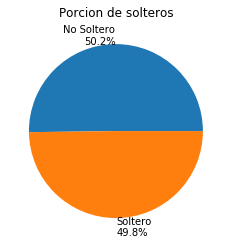

In [51]:
plt.pie(civil, labels=labels)
plt.title('Porcion de solteros')
plt.show()

In [52]:
# Analizando el sueldo de los solteros
# Creando un segmentos de importes
imp_segm = pd.cut(mark['Salario'], [0, 10000,  20000, 30000, 40000, 100000, 180000])
imp_segm

0      (40000, 100000]
1      (40000, 100000]
2       (10000, 20000]
3      (40000, 100000]
4      (40000, 100000]
            ...       
995     (10000, 20000]
996    (40000, 100000]
997    (40000, 100000]
998    (40000, 100000]
999    (40000, 100000]
Name: Salario, Length: 1000, dtype: category
Categories (6, interval[int64]): [(0, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000] < (40000, 100000] < (100000, 180000]]

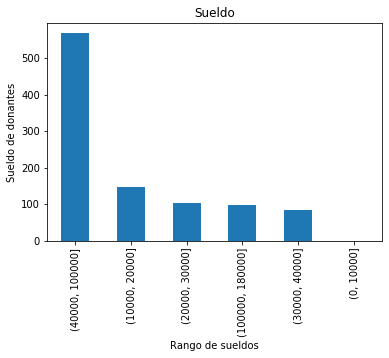

In [53]:

# Creando el grafico de barras desde pandas
plot = pd.value_counts(imp_segm).plot(kind='bar',
                                      title='Sueldo')
plot.set_ylabel('Sueldo de donantes')
plot.set_xlabel('Rango de sueldos')
plt.show()

In [54]:
# Agrupación por segmento segun sueldo.
pd.value_counts(imp_segm)

(40000, 100000]     568
(10000, 20000]      148
(20000, 30000]      102
(100000, 180000]     97
(30000, 40000]       85
(0, 10000]            0
Name: Salario, dtype: int64

In [35]:
# importe de salario promedio
mark['Salario'].mean()

56103.9

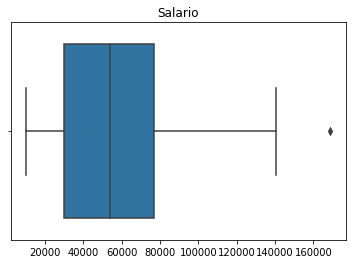

In [55]:
# Gráfico de cajas del importe de donación
sns.boxplot(list(mark['Salario']))
plt.title('Salario')
plt.show()

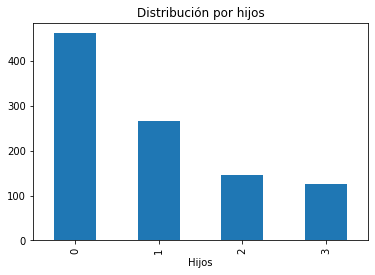

In [56]:
# Grafico del número de hijo
mark.groupby('Hijos').size().plot(kind='bar')
plt.title('Distribución por hijos')
plt.show()

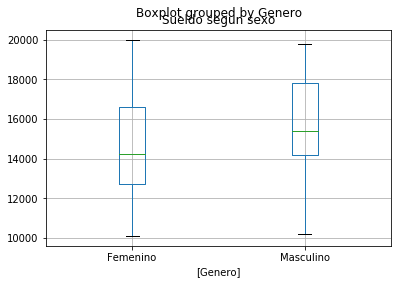

In [57]:
# sueldo segun el género
mark[(mark.Salario <= 20000)
             & (mark.Genero.isin(['Femenino', 'Masculino'])
               )][['Salario', 'Genero']].boxplot(by='Genero')
plt.title('Sueldo segun sexo')
plt.show()

In [58]:
# Media de sueldo por mujeres
mark[mark.Genero == 'Femenino'][['Salario']].mean()

Salario    48197.43083
dtype: float64

In [59]:
# Media de sueldo por hombres
mark[mark.Genero == 'Masculino'][['Salario']].mean()

Salario    64202.42915
dtype: float64

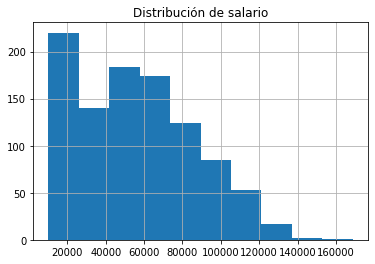

In [60]:
# Distribución de salario
mark['Salario'].hist().set_title('Distribución de salario')
plt.show()

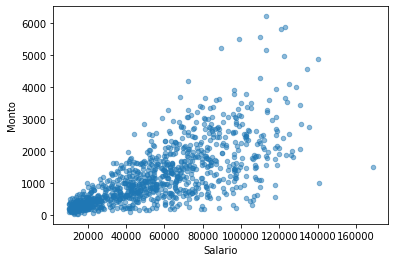

In [61]:
mark.plot.scatter(x="Salario", y='Monto', alpha = 0.5);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


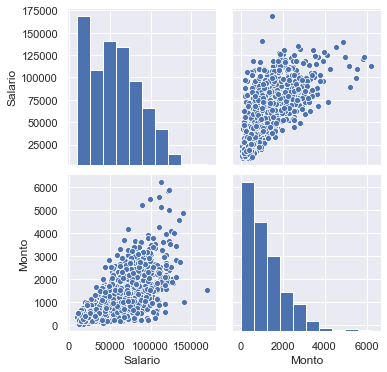

In [62]:
# Scatter plot:

sns.set()
cols = ['Salario', 'Monto']
sns.pairplot(mark[cols], size = 2.5)
plt.show();

[Ir a inicio](#beginning)
____

## Particionar un conjunto de datos en un conjunto de entrenamiento y prueba

In [63]:
import pandas as pd
import numpy as np

In [64]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# si el conjunto de datos de Wine no está disponible temporalmente en
# repositorio de datos de Machine Learning de UCI, descomente la siguiente línea
# de código para cargar el conjunto de datos desde una ruta local:
# df_wine = pd.read_csv('wine.data', header=None)

In [65]:

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

#print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [68]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [69]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [70]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.25, 
                     random_state=0, 
                     stratify=y)

In [72]:
columnas = ['Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [73]:
X_train_df = pd.DataFrame(X_train,columns=columnas)
X_train_df.head(8)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0
1,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
2,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0
3,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0
4,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
5,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0
6,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0
7,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0


In [74]:
columnas = ['Class label']

In [75]:
y_train_df = pd.DataFrame(y_train,columns=columnas)
y_train_df.head(8)

,Class label
0,1
1,2
2,2
3,3
4,2
5,1
6,3
7,2


In [82]:
data_entrenamiento = pd.concat([y_train_df, X_train_df], axis=1)
data_entrenamiento.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0
1,2,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
2,2,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0
3,3,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0
4,2,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0


[Ir a inicio](#beginning)
____

## Caso Practico

### Descripción

Este conjunto de datos es un subconjunto de la Encuesta nacional de prevalencia de anticonceptivos de Indonesia de 1987. Las muestras son mujeres casadas que no estaban embarazadas o no saben si estaban en el momento de la entrevista. El problema es predecir la elección actual del método anticonceptivo (sin uso, métodos a largo plazo o métodos a corto plazo) de una mujer en función de sus características demográficas y socioeconómicas.

### Información del atributo:

1. Edad de la esposa (numérica)

2. Educación de la esposa (categórica) 1 = baja, 2, 3, 4 = alta

3. Educación del esposo (categórica) 1 = baja, 2, 3, 4 = alta

4. Número de hijos nacidos (numérico)

5. Religión de la esposa (binaria) 0 = No Islam, 1 = Islam

6. ¿La esposa ahora está trabajando? (binario) 0 = Sí, 1 = No

7. Ocupación del esposo (categórica) 1, 2, 3, 4

8. Índice de nivel de vida (categórico) 1 = bajo, 2, 3, 4 = alto

9. Exposición a los medios (binario) 0 = Bueno, 1 = No bueno

10. Método anticonceptivo utilizado (atributo de clase) 1 = Sin uso, 2 = A largo plazo, 3 = A corto plazo

Actividades:

1-Graficar el numero y porcentaje de religion de la esposa.

2-Segmentacion de la edad de la esposa.

3-Grafica de boxplot de los datos cuantitativos.

4-Graficar el diagrama de dispersion y el histrograma para mostrar la relacion entre las variables.


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:

df_metodoanticonceptivo = pd.read_csv('https://query.data.world/s/kmtzduntrfduzq7ock75atyluguk6z')


In [58]:
df_metodoanticonceptivo.columns = ['edad_esposa', 'educacion_esposa', 'educacion_esposo', 'numero_hijos_nacidos',
                   'religion_esposa', 'trabaja_esposa', 'ocupacion_esposo',
                   'ind_nivel_vida', 'expo_medios', 'metodo_anticonceptivo']
df_metodoanticonceptivo.head()

,edad_esposa,educacion_esposa,educacion_esposo,numero_hijos_nacidos,religion_esposa,trabaja_esposa,ocupacion_esposo,ind_nivel_vida,expo_medios,metodo_anticonceptivo
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1
